# Q4 Data Mayhem: Conjuring insights from the data (9 Marks)
## Advanced Data Analysis and Prediction
**Description:** This section will involve investigating unusual data patterns, building predictive models, and reducing dimensionality to gain deeper insights.


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData.csv')

### 4.a Outliers in Fare and Tips (4 Marks):

(a) Use box plots to identify outliers in fare and tip values.

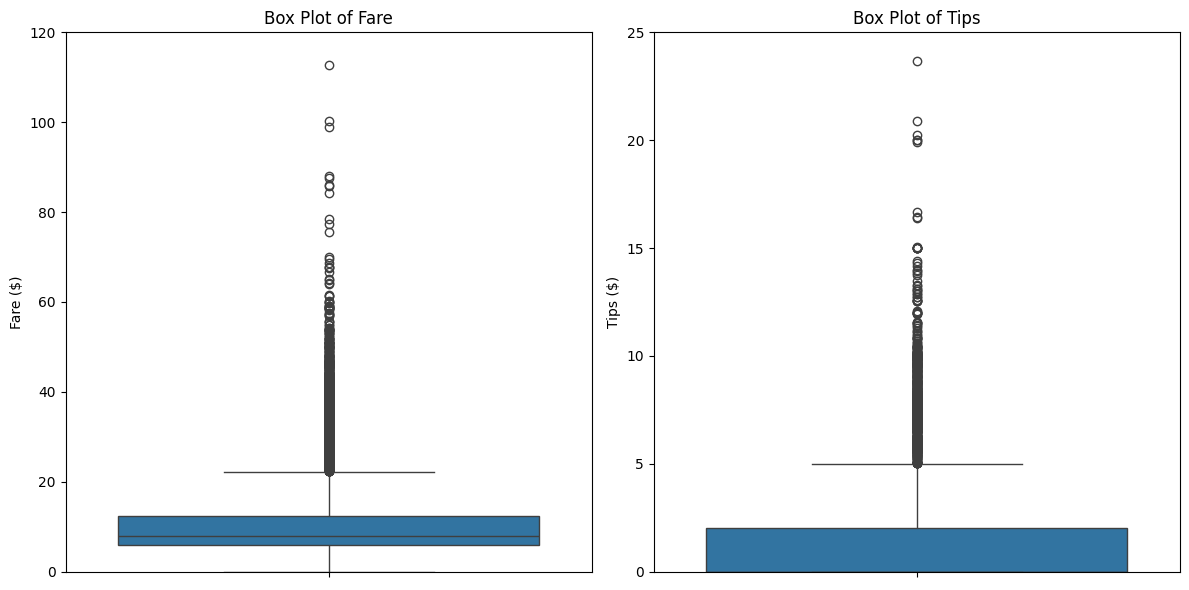

In [5]:
plt.figure(figsize=(12, 6))

# Box plot for fare
plt.subplot(1, 2, 1)
sns.boxplot(y='fare', data=df)
plt.ylim(0, 120)
plt.title('Box Plot of Fare')
plt.ylabel('Fare ($)')

# Box plot for tips
plt.subplot(1, 2, 2)
sns.boxplot(y='tips', data=df)
plt.ylim(0,25)
plt.title('Box Plot of Tips')
plt.ylabel('Tips ($)')

plt.tight_layout()
plt.show()

In [6]:
# Identifying outliers using IQR method for both fare and tips
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Identify outliers in fare and tips
fare_outliers = identify_outliers(df['fare'])
tips_outliers = identify_outliers(df['tips'])

print(f"Number of fare outliers: {len(fare_outliers)}")
print(f"Number of tips outliers: {len(tips_outliers)}")

Number of fare outliers: 1872
Number of tips outliers: 839


(b) Interpretation: Discuss how these outliers might skew average calculations.

(c) Suggest methods for handling these outliers in predictive models (e.g., removal or adjustment).

### 4.b Predicting Fare (5 Marks):

(a) Implement a regression model using distance, trip duration, and location as predictors to estimate fares.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# (a) Prepare the data by selecting predictors and the target variable
# Dropping rows with missing values for simplicity
df = df.dropna(subset=['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'fare'])

# Define predictors and target
X = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = df['fare']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

(b) Model Evaluation: Present metrics such as RMSE to assess model accuracy.

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 20.16


(c) Discuss the effectiveness of the model, noting any potential limitations or areas for improvement.